### Al NMR Figure Generation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import itertools
import sys
%matplotlib inline

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Import and examine the data

In [2]:
# import the data collected
# This data was organized on a google spreadsheet
data_path = "/home/tylerbiggs/git/pyluminate/data/al_nmr_data.csv"
# data_path = r"C:\Users\Tyler\Documents\pyluminate/data/al_nmr_data.csv"

AlNMRData = pd.read_csv(data_path)
list(AlNMRData)

['Al_concentration',
 'OH_concentration',
 'Al_ppm',
 'counter_ion',
 'temperature']

### Derivative Column Creation

In [3]:
# Filter off the Cs+ counter ions -- there are only three of them
# AlNMRData = AlNMRData[(AlNMRData.counter_ion != "Cs+")]

#### Aluminum to Hydroxide concentration ratio

In [4]:
AlNMRData['Al_OH_ratio'] = AlNMRData["Al_concentration"] / AlNMRData["OH_concentration"]
AlNMRData['OH_Al_ratio'] = AlNMRData["OH_concentration"] / AlNMRData["Al_concentration"]

#### Creation of colormap columns

In [5]:
# Get a color map
cm = plt.cm.get_cmap('viridis')

OH_cm = cm(AlNMRData["OH_concentration"])

### A look at all the data

In [6]:
AlNMRData.head()
# AlNMRData

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio
0,0.005,1.0,80.45,Na+,25,0.005000,200.0
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0


##### How many unique values are present in the Al_concentration column?

In [7]:
print(AlNMRData.Al_concentration.unique())
print(len(AlNMRData.Al_concentration.unique()))

[  5.00000000e-03   5.00000000e-02   1.00000000e-01   3.96000000e-01
   8.00000000e-01   1.20000000e+00   2.00000000e+00   3.00000000e+00
   5.00000000e-01   1.28000000e+00   6.00000000e+00]
11


## Setup some plotting tools

In [8]:
# Setup a maker iterator
marker = itertools.cycle((',', '+', '.', 'o', '*', "v", '^', '>', '<', '1', '2', '3', '4'))
marker_list = [',', '+', '.', 'o', '*', "v", '^', '>', '<', '1', '2']

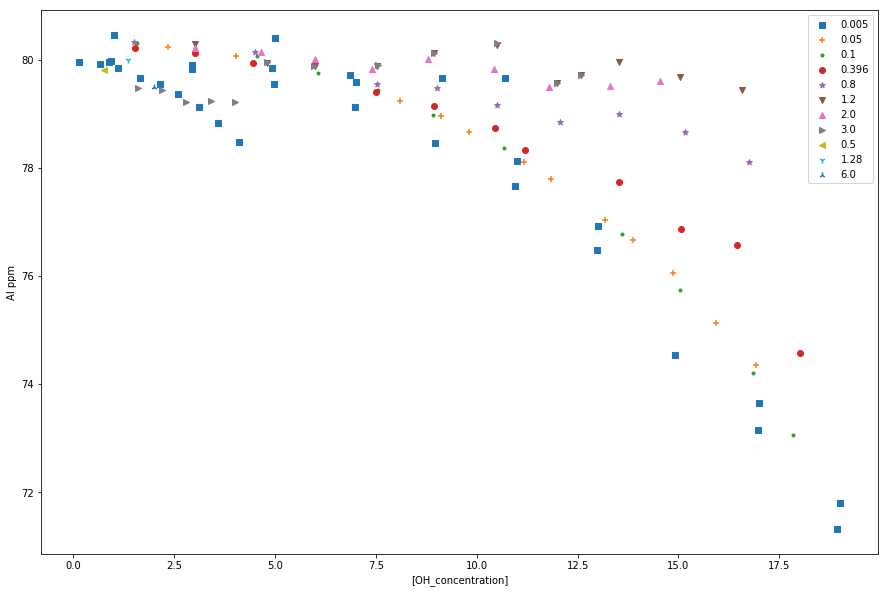

In [10]:
fig1, ax1 = plt.subplots(figsize=(15,10))
# ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_concentration,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
    
ax1.legend()
plt.ylabel("Al ppm")
plt.xlabel("[OH_concentration]")
plt.show()

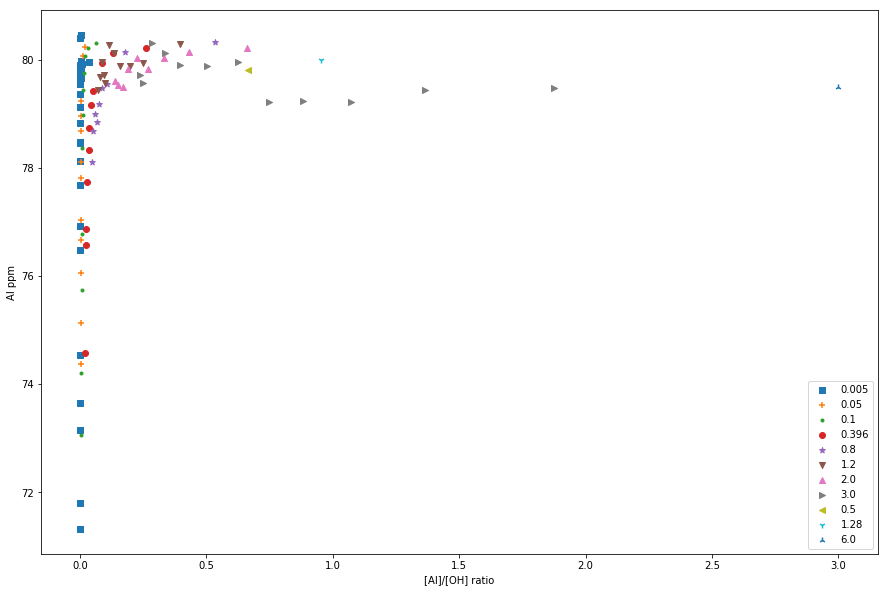

In [12]:
fig1, ax1 = plt.subplots(figsize=(15,10))
# ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_OH_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
    # Calculate
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax1.legend()
plt.ylabel("Al ppm")
plt.xlabel("[Al]/[OH] ratio")
plt.show()

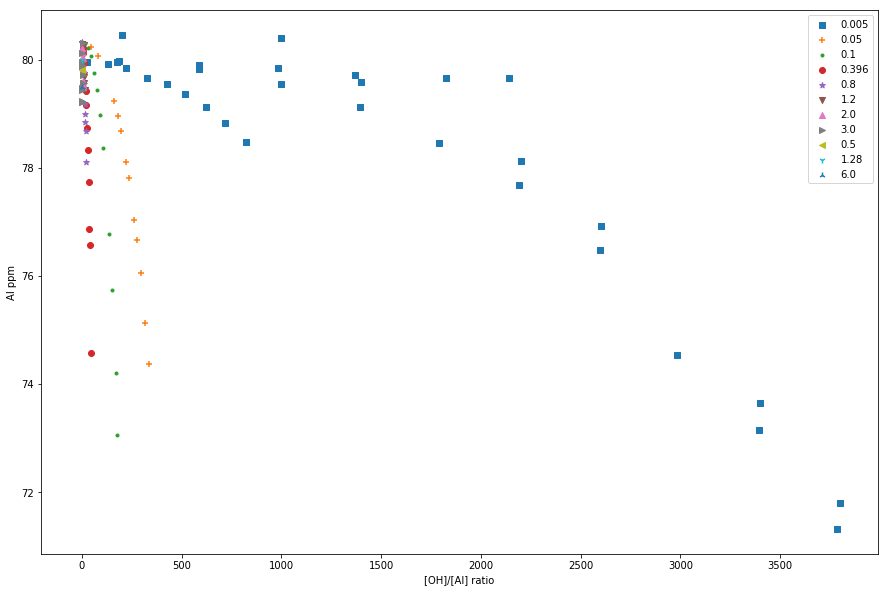

In [15]:
fig1, ax1 = plt.subplots(figsize=(15,10))
unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_Al_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    

plt.ylabel("Al ppm")
plt.xlabel("[OH]/[Al] ratio")
ax1.legend()
plt.show()

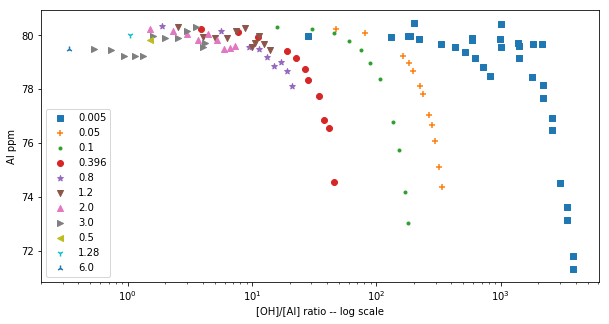

In [17]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_Al_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm")
plt.xlabel("[OH]/[Al] ratio -- log scale")
ax1.legend()
plt.show()

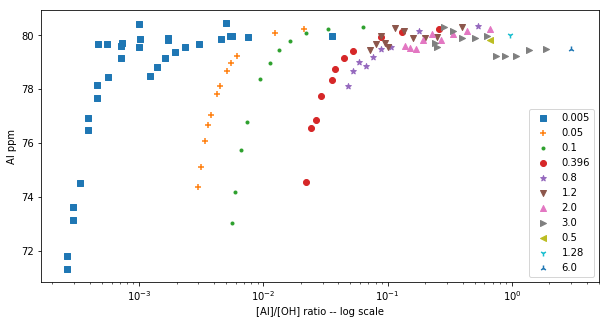

In [21]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_OH_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm")
plt.xlabel("[Al]/[OH] ratio -- log scale")
ax1.legend()
plt.show()

### Interesting pattern observed above. Explore further.

#### Plot linear regressions by aluminum concentration
http://www.statsmodels.org/dev/rlm.html

/home/tylerbiggs/.virtualenvs/python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


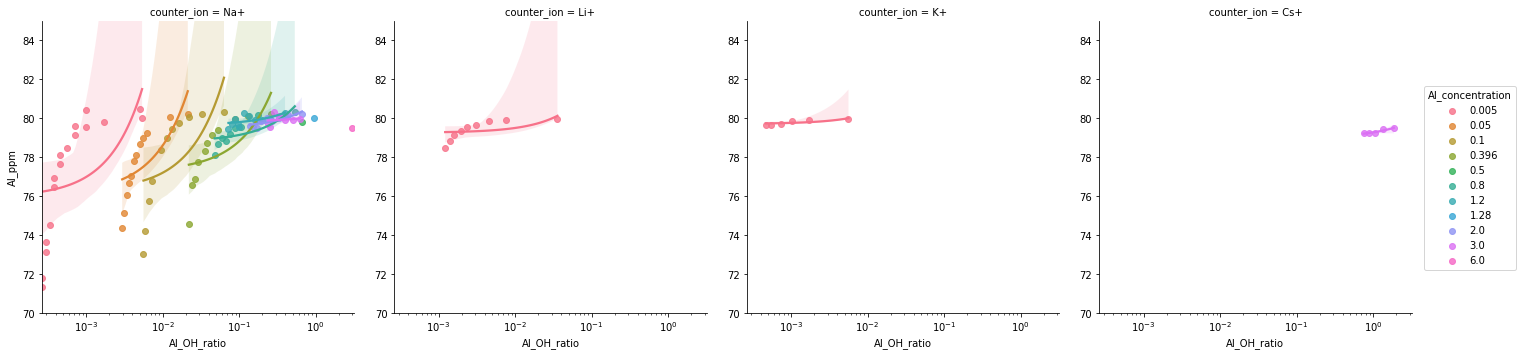

In [15]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
)
g1.set(xscale="log")
# http://www.statsmodels.org/dev/rlm.html
axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

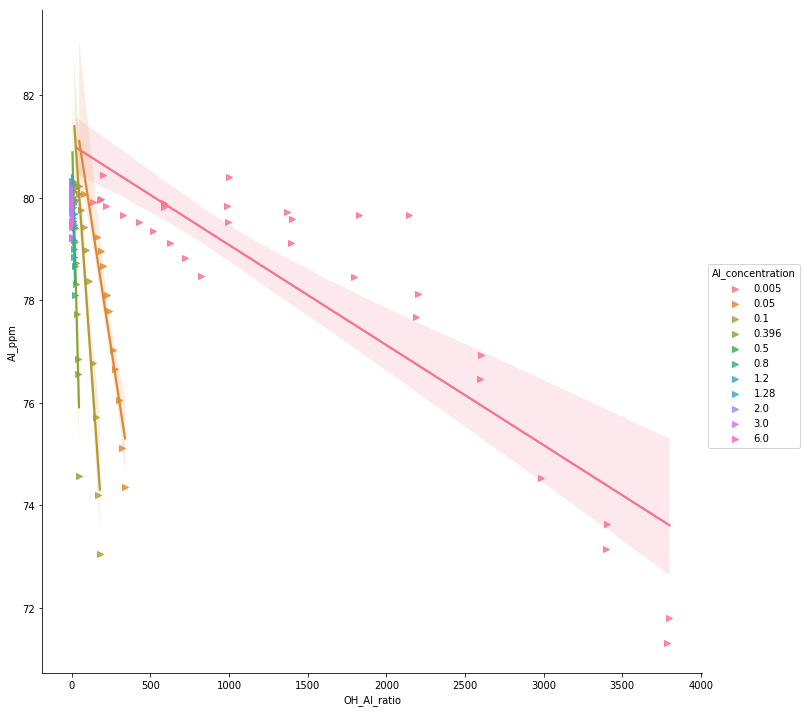

In [33]:
g1 = sns.lmplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    markers=next(marker),
    size=10
#     col="counter_ion",
)
# g1.set(xscale="log")
# http://www.statsmodels.org/dev/rlm.html
# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
plt.show()

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


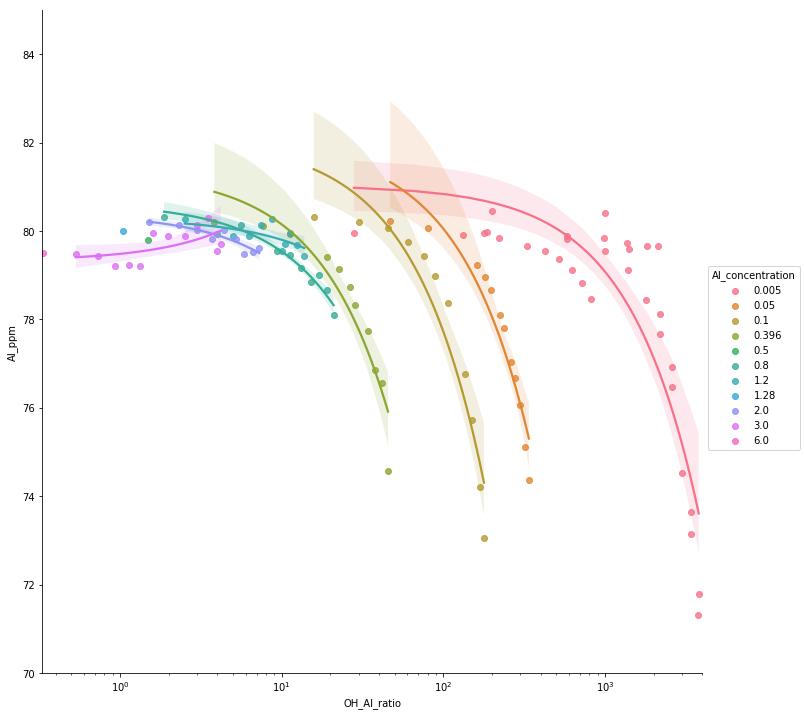

In [32]:
g1 = sns.lmplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    size=10
#     col="counter_ion",
)
g1.set(xscale="log")
axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### locally weighted linear regression
A good fit, but I don't see how this is usefull.

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


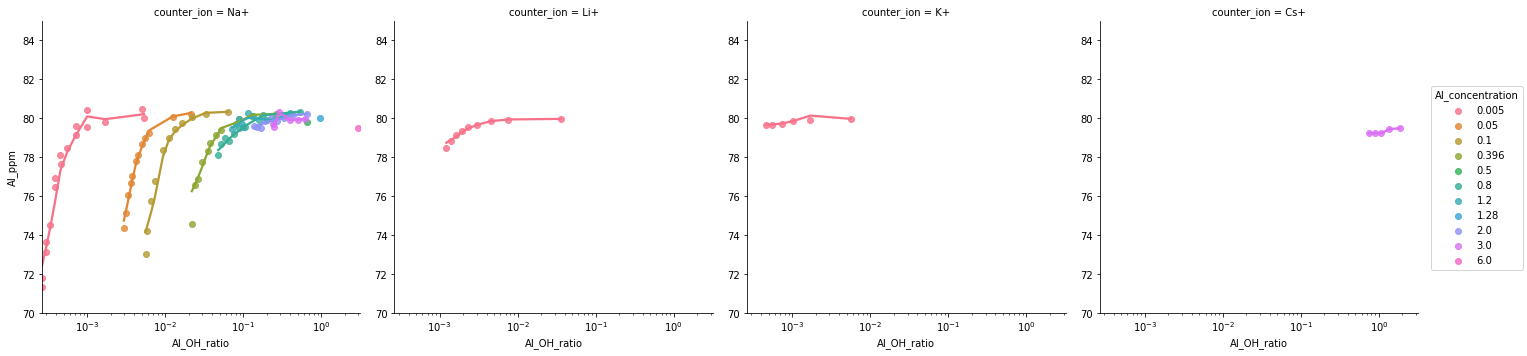

In [18]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    lowess=True
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### Check different orders of fitting

I tried up to 5, no good fits emereged.

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y,

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


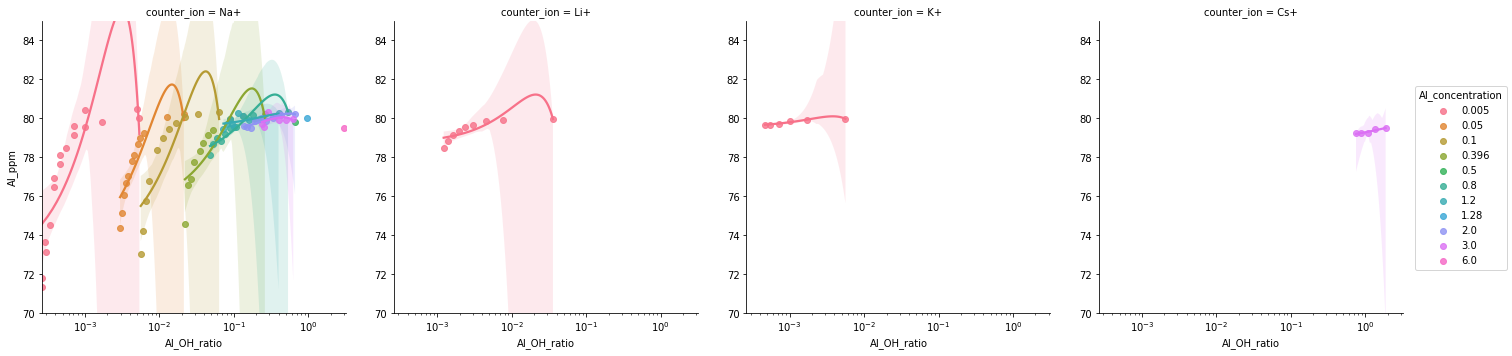

In [21]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    order=2,
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### Robust Regression

Warning!!! Long run time or crahes -- depending on system

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\statsmodels\robust\robust_linear_model.py:284: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\statsmodels\robust\robust_linear_model.py:284: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\numpy\linalg\linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\Tyler\Anaconda3\en

ZeroDivisionError: float division by zero

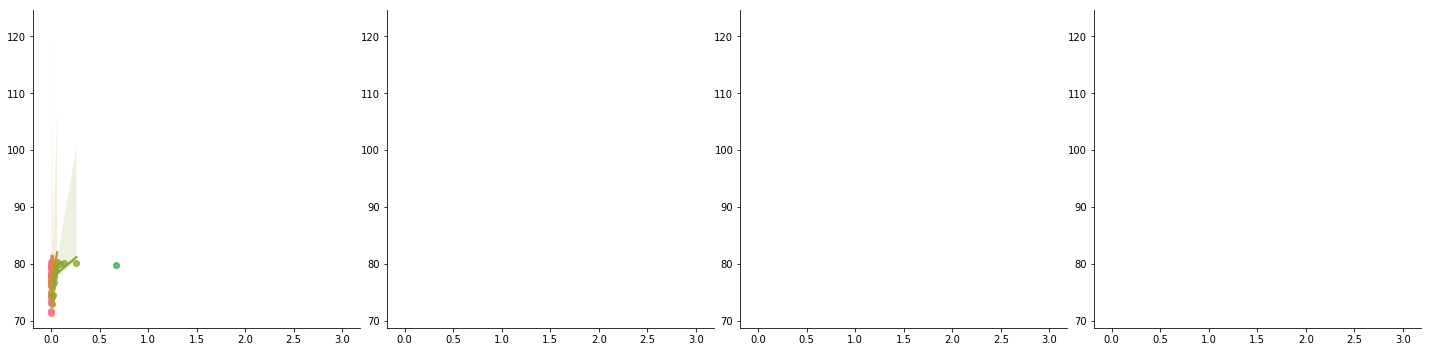

In [24]:
# g1 = sns.lmplot(
#     x="Al_OH_ratio",
#     y="Al_ppm",
#     hue="Al_concentration",
#     data=AlNMRData,
#     truncate=True,
#     col="counter_ion",
#     robust=True
# )
# g1.set(xscale="log")

# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
# plt.show()

#### y ~ log(x)
Might be a little better. Still does not depict the data.

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


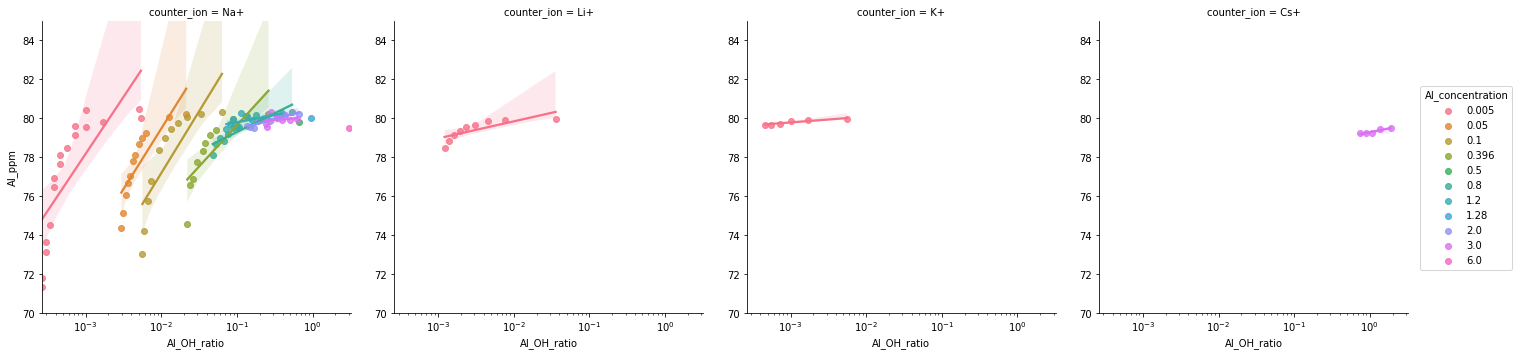

In [25]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    logx=True
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

Some observartions:

+ All concentrations trend towards the 80 pmm valueas the

### Try to run a linear regression over the entire dataset

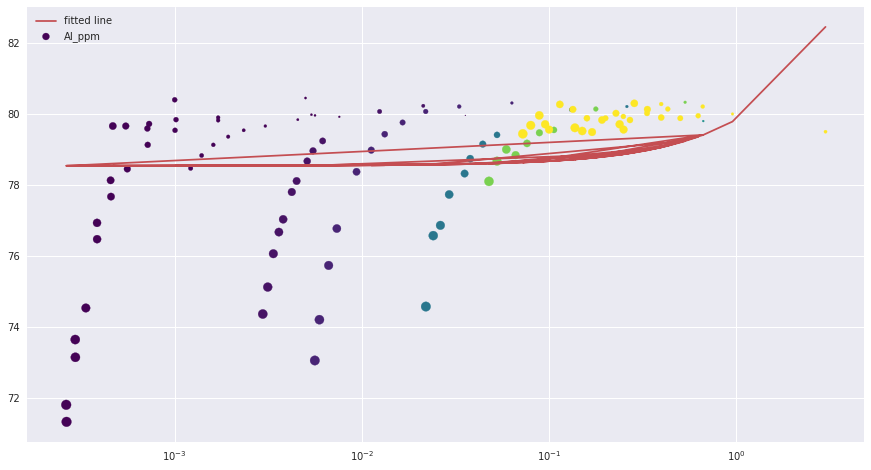

In [57]:
f, ax = plt.subplots(figsize=(15, 8))

ax.set(xscale="log")

plt.scatter(
    x=AlNMRData.Al_OH_ratio,
    y=AlNMRData.Al_ppm,
    c=cm(AlNMRData.Al_concentration),
    s=AlNMRData.OH_concentration*5
)

# run a simple linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(AlNMRData.Al_OH_ratio, AlNMRData.Al_ppm)

plt.plot(AlNMRData.Al_OH_ratio, intercept + slope*AlNMRData.Al_OH_ratio, 'r', label='fitted line')

# legend = ax.get_legend()
ax.legend()


# plt.colorbar()
plt.show()

### Try on a subset of data

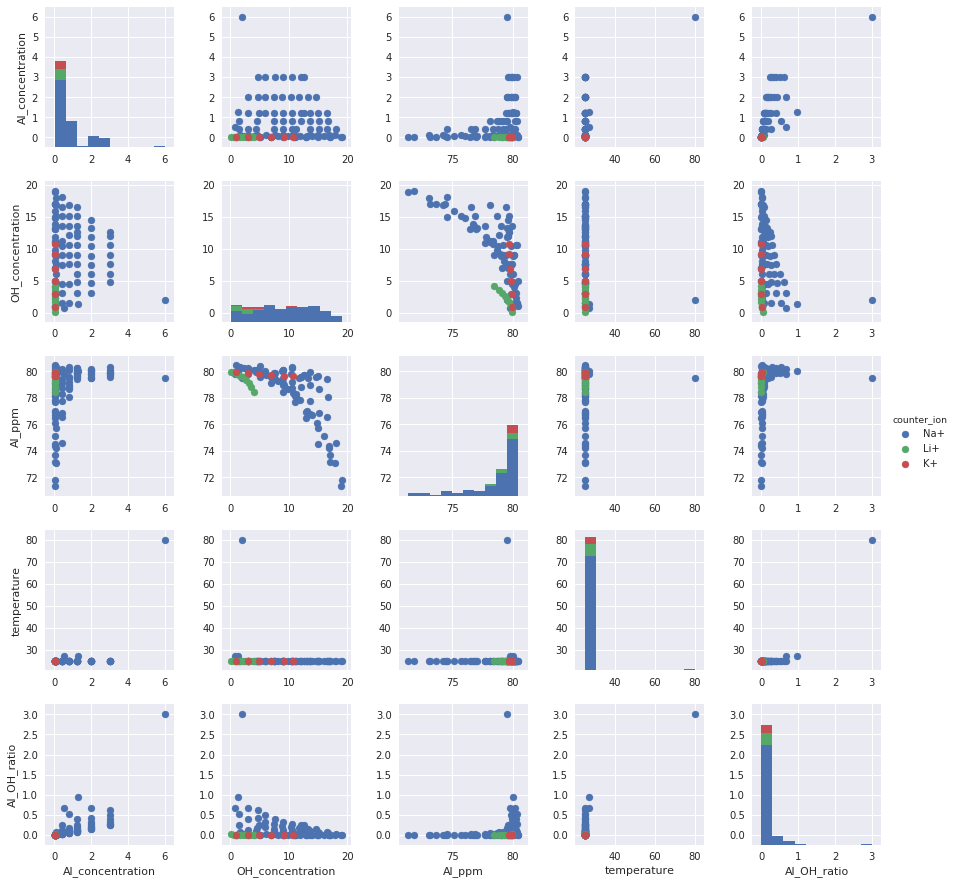

In [58]:
g = sns.PairGrid(AlNMRData, hue="counter_ion")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

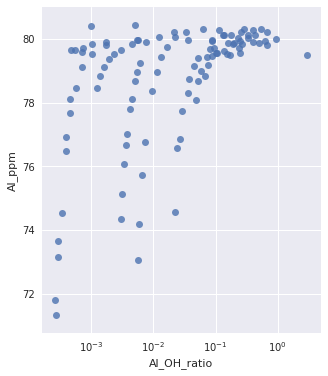

In [38]:
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")

sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    data=AlNMRData,
    ax=ax,
#     hue="Al_concentration",
    fit_reg=False
)

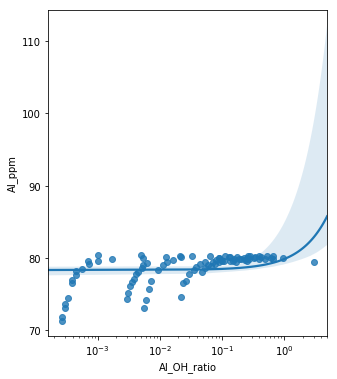

In [35]:
# Setup the figure and axis so that we can control them via the matplotlib interface.
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")


g2 = sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
#     color="Al_concentration",
    ax=ax,
    data=AlNMRData[(AlNMRData.counter_ion == "Na+")],
)

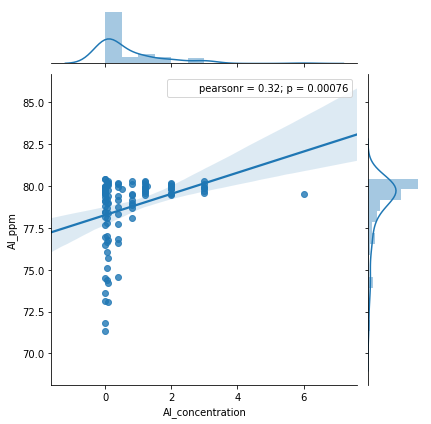

In [36]:
sns.jointplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
#     hue="counter_ion",
    kind="reg",
)

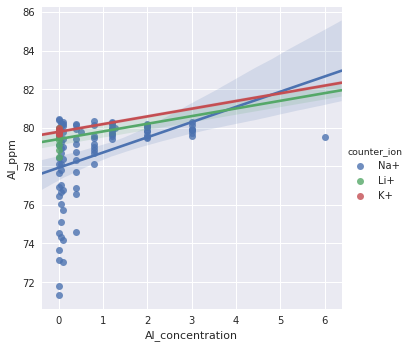

In [37]:
sns.set(style="darkgrid", color_codes=True)

g1 = sns.lmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue="counter_ion"
)